<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_31_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

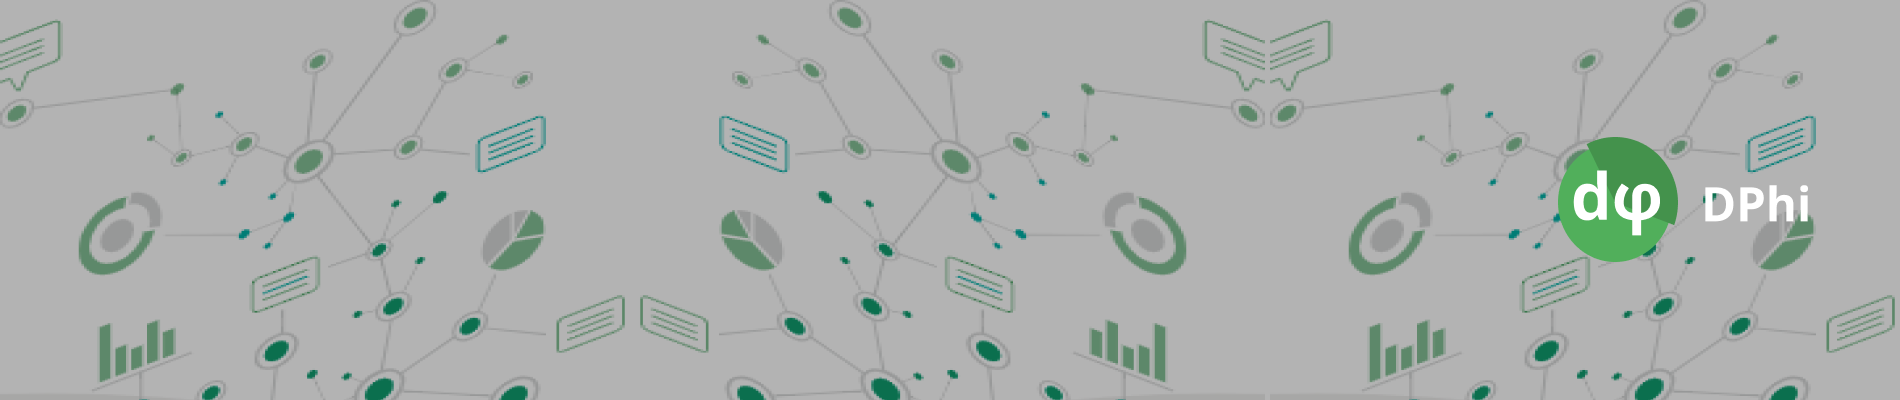

## Problem Statement

Among many cancers, breast cancer is the second most common cause of death in women. Early detection and early treatment reduce breast cancer mortality. Mammography plays an important role in breast cancer screening because it can detect early breast masses or calcification regions.

## Objective 

Build a machine learning model to detect breast masses and calcification region.

## Download the images

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip "/content/drive/MyDrive/Adrain/mammography_images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: mammography_images/train/Image_1651.jpg  
  inflating: mammography_images/train/Image_1652.jpg  
  inflating: mammography_images/train/Image_1653.jpg  
  inflating: mammography_images/train/Image_1654.jpg  
  inflating: mammography_images/train/Image_1655.jpg  
  inflating: mammography_images/train/Image_1656.jpg  
  inflating: mammography_images/train/Image_1657.jpg  
  inflating: mammography_images/train/Image_1658.jpg  
  inflating: mammography_images/train/Image_1659.jpg  
  inflating: mammography_images/train/Image_166.jpg  
  inflating: mammography_images/train/Image_1660.jpg  
  inflating: mammography_images/train/Image_1661.jpg  
  inflating: mammography_images/train/Image_1662.jpg  
  inflating: mammography_images/train/Image_1663.jpg  
  inflating: mammography_images/train/Image_1664.jpg  
  inflating: mammography_images/train/Image_1665.jpg  
  inflating: mammography_images/train/Image_1666.jpg  
  inflating: ma

## Montages of the Training Images

In [2]:
from imutils import build_montages
from imutils import paths
import argparse
import random
import cv2

## grab the paths to the images, then randomly select a sample of them

In [8]:
imagePaths = list(paths.list_images("/content/mammography_images/train/"))
random.shuffle(imagePaths)
imagePaths = imagePaths[:21]

In [12]:
imagePaths[0]

'/content/mammography_images/train/Image_4036.jpg'

## Read a sample imges and find the shape of the images

In [13]:
img = cv2.imread(imagePaths[0])
img.shape

(224, 224, 3)

In [9]:
# initialize the list of images
images = []
# loop over the list of image paths
for imagePath in imagePaths:
	# load the image and update the list of images
	image = cv2.imread(imagePath)
	images.append(image)
# construct the montages for the images
montages = build_montages(images, (224, 224), (7, 3))

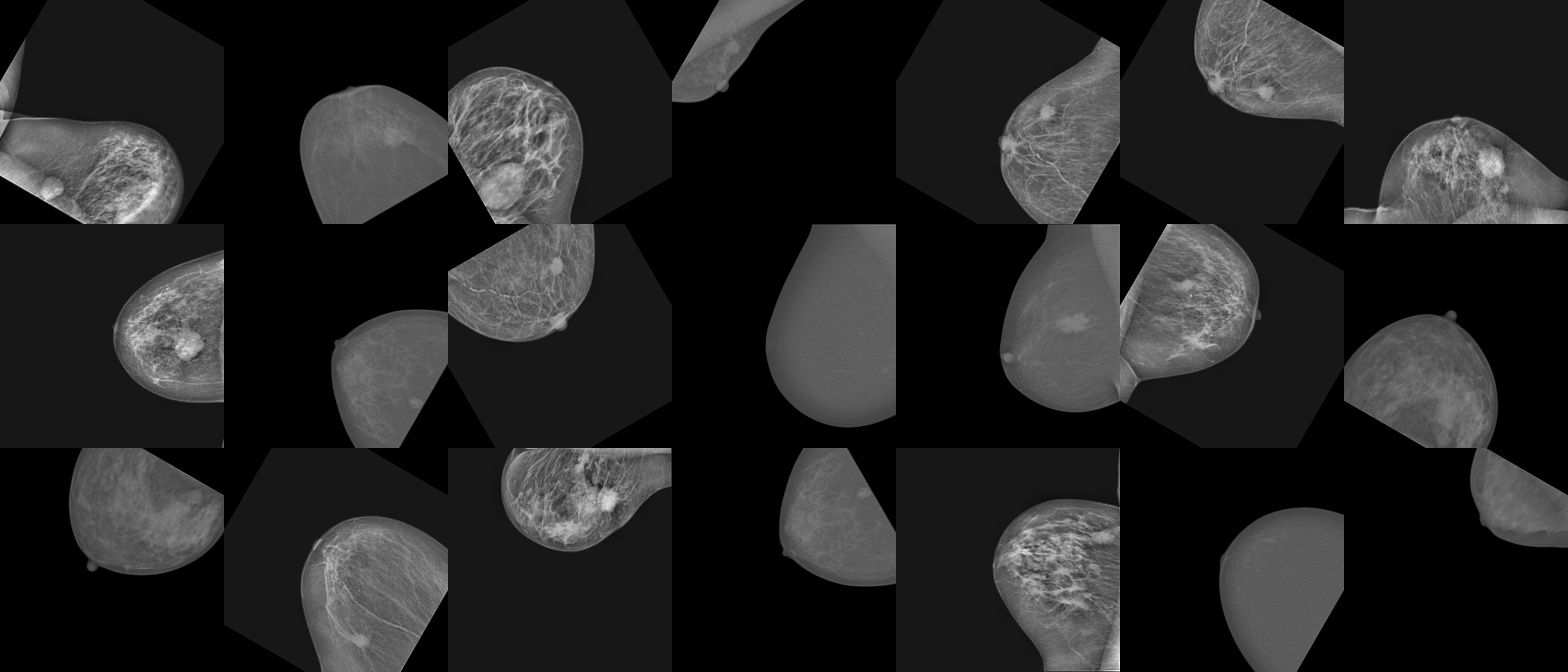

In [11]:
# loop over the montages and display each of them
from google.colab.patches import cv2_imshow
for montage in montages:
	cv2_imshow(montage)


In [16]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix
#
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
import glob
#
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *
#

import warnings
warnings.filterwarnings('ignore')

In [17]:
path ='/content/mammography_images/train/'
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '/content/mammography_images/Training_set.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/mammography_images/test')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8))

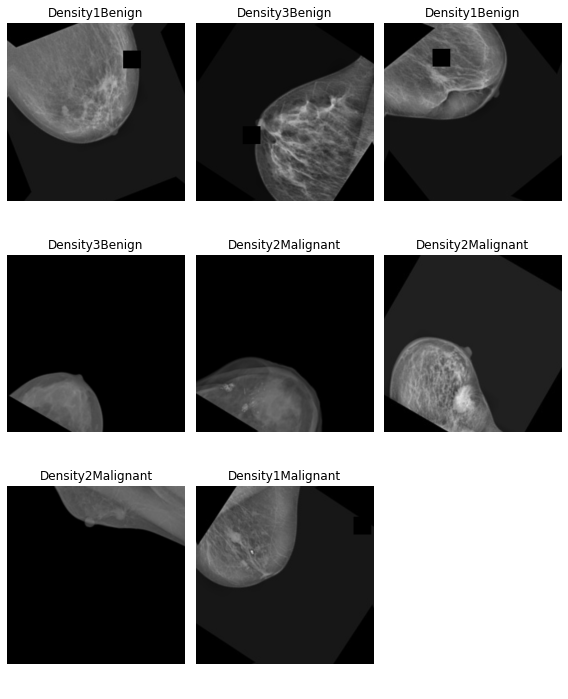

In [18]:
## to see the images in train with there labels
data.show_batch(rows=3, figsize=(8,10))

In [21]:
## print the target classes
val=data.classes
print(f"The number of target class : {data.c} and the respective target classes are a: {data.classes}")

The number of target class : 8 and the respective target classes are a: ['Density1Benign', 'Density1Malignant', 'Density2Benign', 'Density2Malignant', 'Density3Benign', 'Density3Malignant', 'Density4Benign', 'Density4Malignant']


In [29]:
data

ImageDataBunch;

Train: LabelList (4580 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
Density3Benign,Density1Malignant,Density1Benign,Density1Malignant,Density1Benign
Path: /content/mammography_images/train;

Valid: LabelList (1144 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
Density2Malignant,Density3Malignant,Density1Malignant,Density1Malignant,Density3Benign
Path: /content/mammography_images/train;

Test: LabelList (1908 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: EmptyLabelList
,,,,
Path: /content/mammography_images/train

In [30]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy])

In [31]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.761656,1.153531,0.395105,0.604895,02:37
1,1.126953,0.420879,0.159965,0.840035,02:36
2,0.655233,0.167331,0.048951,0.951049,02:35
3,0.373729,0.059817,0.013986,0.986014,02:35
4,0.280786,0.042996,0.008741,0.991259,02:35


In [36]:
F1 =  MultiLabelFbeta(beta=8, average="macro")

In [39]:
learn2 = learn = cnn_learner(data, models.resnet152, metrics=[error_rate, accuracy,F1])

In [40]:
learn2.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,multi_label_fbeta,time
0,1.892222,1.197961,0.435315,0.564685,0.614967,04:06
1,1.219828,0.540109,0.184441,0.815559,0.571111,04:05
2,0.513727,0.171514,0.058566,0.941434,0.502034,04:05
3,0.343005,0.042226,0.007867,0.992133,0.456407,04:05
4,0.228672,0.035640,0.006993,0.993007,0.466893,04:05


In [41]:
path= '/content/mammography_images/'
k= '/content/mammography_images/Training_set.csv'
p ='/content/mammography_images/Testing_set.csv'
#
train=pd.read_csv(k)
test=pd.read_csv(p)

In [42]:
train.head()

,filename,label
0,Image_1.jpg,Density3Benign
1,Image_2.jpg,Density1Benign
2,Image_3.jpg,Density1Malignant
3,Image_4.jpg,Density1Benign
4,Image_5.jpg,Density1Malignant


## Visualization of Labels

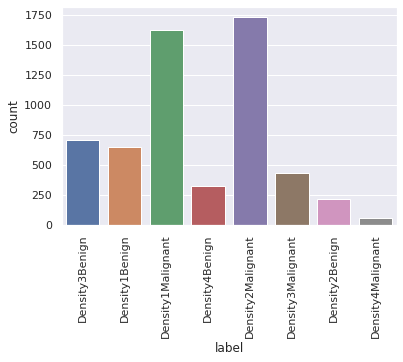

In [44]:
sns.set(style='darkgrid')
plt.xticks(rotation=90)
sns.countplot(x="label",data=train)

In [49]:
np.random.seed(1786)
ROOT = "/content/mammography_images"

In [45]:
def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

In [46]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss):
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [53]:
if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=12345786).split(train_df, train_df.label))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(1):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT, folder="train").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=3).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="test"))
        print(data)
        learn = cnn_learner(data, models.densenet121, metrics=accuracy,ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(2)
        learn.unfreeze()
        learn.fit_one_cycle(2, max_lr=1e-4, callbacks=[cb])
        #learn.fit_one_cycle(10, max_lr=5e-5, callbacks=[cb])
        #learn.fit_one_cycle(10, max_lr=1e-5, callbacks=[cb])
        #learn.fit_one_cycle(10, max_lr=5e-6, callbacks=[cb])
        learn.fit_one_cycle(2, max_lr=1e-6, callbacks=[cb])
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)


(5724, 2) (1908, 1)
Starting fold 0
(5366,) (358,)
ImageDataBunch;

Train: LabelList (5366 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Density3Malignant,Density4Benign,Density4Malignant,Density4Malignant,Density4Benign
Path: /content/mammography_images;

Valid: LabelList (358 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Density3Benign,Density1Benign,Density1Malignant,Density1Benign,Density1Malignant
Path: /content/mammography_images;

Test: LabelList (1908 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/mammography_images


epoch,train_loss,valid_loss,accuracy,time
0,1.694976,0.858101,0.656425,00:41
1,0.904192,0.472091,0.832402,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.617252,0.315574,0.902235,00:42
1,0.305324,0.100374,0.966480,00:42


Save the best acc 0.90223
Save the best acc 0.96648


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.258938,0.096692,0.969274,00:43
1,0.247956,0.089772,0.966480,00:42


Save the best acc 0.96927
Save the best acc 0.96648


F1 score for this fold  0.9972061915789844


In [55]:
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [56]:
sub = test_df[["filename"]]
sub["label"] = np.argmax(test_preds, axis=1)


In [57]:
sub.head()

,filename,label
0,Image_1.jpg,4
1,Image_2.jpg,0
2,Image_3.jpg,3
3,Image_4.jpg,0
4,Image_5.jpg,5


In [58]:
val

['Density1Benign',
 'Density1Malignant',
 'Density2Benign',
 'Density2Malignant',
 'Density3Benign',
 'Density3Malignant',
 'Density4Benign',
 'Density4Malignant']

In [59]:
sub['label'].apply(lambda x : val[x])

0          Density3Benign
1          Density1Benign
2       Density2Malignant
3          Density1Benign
4       Density3Malignant
              ...        
1903    Density1Malignant
1904       Density4Benign
1905    Density2Malignant
1906    Density2Malignant
1907    Density2Malignant
Name: label, Length: 1908, dtype: object

In [60]:
sub['label'] = sub['label'].apply(lambda x : val[x])

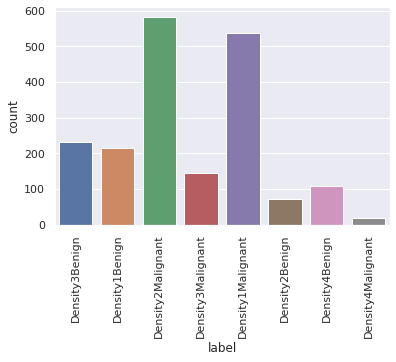

In [61]:
sns.set_style('darkgrid')
plt.xticks(rotation =90)
sns.countplot(x='label',data=sub)
plt.show()

##Save files locally

In [62]:
sub.to_csv("submission_densenet121.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission_densenet121.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Submission Scores of 1 epoch

**Submission successful! Your score is 99.37106918238993.**

## Trying out 20 epochs


In [65]:
if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=12345786).split(train_df, train_df.label))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(20):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT, folder="train").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=3).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="test"))
        learn = cnn_learner(data, models.densenet121, metrics=accuracy, ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(4)
        learn.unfreeze()
        learn.fit_one_cycle(10, max_lr=1e-4, callbacks=[cb])
        learn.fit_one_cycle(10, max_lr=5e-5, callbacks=[cb])
        learn.fit_one_cycle(10, max_lr=1e-5, callbacks=[cb])
        learn.fit_one_cycle(10, max_lr=5e-6, callbacks=[cb])
        learn.fit_one_cycle(7, max_lr=1e-6, callbacks=[cb])
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)

    np.save("test_preds.npy", test_preds_all)
    np.save("val_preds.npy", val_preds_all)

(5724, 2) (1908, 1)
Starting fold 0
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.838216,1.091156,0.634078,00:39
1,1.002379,0.534216,0.801676,00:39
2,0.624159,0.282162,0.899441,00:39
3,0.473686,0.212256,0.927374,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.392293,0.172555,0.946927,00:43
1,0.342648,0.293901,0.885475,00:43
2,0.234110,0.051422,0.986033,00:43
3,0.138820,0.033235,0.991620,00:43
4,0.089779,0.023838,0.994413,00:43
5,0.076313,0.015043,0.997207,00:42
6,0.040247,0.004908,1.000000,00:43
7,0.032654,0.002529,1.000000,00:43
8,0.022194,0.001154,1.000000,00:43


Save the best acc 0.94693
Save the best acc 0.98603
Save the best acc 0.99162
Save the best acc 0.99441
Save the best acc 0.99721
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.017144,0.001714,1.000000,00:43
1,0.025632,0.002972,1.000000,00:43
2,0.034468,0.004433,0.997207,00:44
3,0.029553,0.002006,1.000000,00:43
4,0.028560,0.001868,1.000000,00:43
5,0.034145,0.001511,1.000000,00:42
6,0.014804,0.000445,1.000000,00:43
7,0.007639,0.000347,1.000000,00:43
8,0.010092,0.000524,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.011373,0.000340,1.000000,00:43
1,0.007687,0.000314,1.000000,00:43
2,0.009103,0.000262,1.000000,00:43
3,0.009717,0.000284,1.000000,00:43
4,0.008084,0.000333,1.000000,00:43
5,0.011307,0.000227,1.000000,00:42
6,0.008634,0.000255,1.000000,00:43
7,0.007528,0.000213,1.000000,00:43
8,0.007051,0.000231,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.005602,0.000237,1.000000,00:43
1,0.007587,0.000232,1.000000,00:42
2,0.008610,0.000225,1.000000,00:43
3,0.004580,0.000187,1.000000,00:43
4,0.008988,0.000192,1.000000,00:43
5,0.008771,0.000229,1.000000,00:43
6,0.008286,0.000142,1.000000,00:43
7,0.005778,0.000161,1.000000,00:43
8,0.004367,0.000151,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.007141,0.000155,1.000000,00:42
1,0.009319,0.000140,1.000000,00:43
2,0.005142,0.000185,1.000000,00:43
3,0.006057,0.000154,1.000000,00:43
4,0.006881,0.000162,1.000000,00:43
5,0.004613,0.000159,1.000000,00:43
6,0.006778,0.000133,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


F1 score for this fold  1.0


Starting fold 1
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.826072,0.974084,0.656425,00:39
1,0.931878,0.512881,0.801676,00:39
2,0.575101,0.270962,0.899441,00:39
3,0.443939,0.231394,0.921788,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.372056,0.195859,0.938547,00:43
1,0.302742,0.200269,0.927374,00:43
2,0.239795,0.119031,0.960894,00:42
3,0.151404,0.023815,0.997207,00:42
4,0.085344,0.011353,1.000000,00:43
5,0.067715,0.019925,0.994413,00:42
6,0.053272,0.004064,1.000000,00:44
7,0.024273,0.002993,1.000000,00:43
8,0.025009,0.006182,0.997207,00:43


Save the best acc 0.93855
Save the best acc 0.96089
Save the best acc 0.99721
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.018240,0.001963,1.000000,00:43
1,0.031528,0.011304,0.994413,00:43
2,0.027595,0.010269,0.994413,00:42
3,0.036821,0.006820,1.000000,00:42
4,0.038029,0.001498,1.000000,00:43
5,0.017724,0.001078,1.000000,00:43
6,0.013896,0.001485,1.000000,00:42
7,0.014149,0.000645,1.000000,00:43
8,0.012686,0.000532,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.012439,0.000369,1.000000,00:43
1,0.012280,0.000814,1.000000,00:43
2,0.008715,0.000613,1.000000,00:43
3,0.011297,0.000492,1.000000,00:43
4,0.006420,0.000229,1.000000,00:43
5,0.007594,0.000291,1.000000,00:43
6,0.009776,0.000372,1.000000,00:43
7,0.006771,0.000286,1.000000,00:43
8,0.007805,0.000270,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.006405,0.000359,1.000000,00:43
1,0.009972,0.000290,1.000000,00:43
2,0.010435,0.000313,1.000000,00:43
3,0.008838,0.000350,1.000000,00:43
4,0.007957,0.000224,1.000000,00:43
5,0.007736,0.000277,1.000000,00:43
6,0.007397,0.000234,1.000000,00:43
7,0.009168,0.000192,1.000000,00:43
8,0.009271,0.000205,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.006110,0.000201,1.000000,00:43
1,0.005443,0.000227,1.000000,00:43
2,0.013515,0.000202,1.000000,00:43
3,0.011674,0.000243,1.000000,00:43
4,0.006498,0.000252,1.000000,00:43
5,0.009586,0.000201,1.000000,00:43
6,0.006931,0.000201,1.000000,00:43


F1 score for this fold  1.0


Starting fold 2
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.841280,1.055931,0.603352,00:39
1,0.989365,0.548078,0.776536,00:38
2,0.589646,0.266710,0.907821,00:39
3,0.449437,0.232549,0.932961,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.382027,0.181071,0.949721,00:43
1,0.307837,0.084938,0.972067,00:43
2,0.208704,0.060036,0.986033,00:43
3,0.170944,0.091483,0.972067,00:43
4,0.095035,0.017435,1.000000,00:43
5,0.067663,0.006345,1.000000,00:43
6,0.053435,0.004233,1.000000,00:43
7,0.025168,0.002030,1.000000,00:43
8,0.020621,0.002045,1.000000,00:43


Save the best acc 0.94972
Save the best acc 0.97207
Save the best acc 0.98603
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.019062,0.001094,1.000000,00:43
1,0.027949,0.002107,1.000000,00:43


Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.019062,0.001094,1.000000,00:43
1,0.027949,0.002107,1.000000,00:43
2,0.041098,0.005666,1.000000,00:43
3,0.029299,0.002045,1.000000,00:43
4,0.030988,0.000784,1.000000,00:43
5,0.025051,0.003366,1.000000,00:43
6,0.016613,0.000833,1.000000,00:43
7,0.012737,0.000414,1.000000,00:43
8,0.008042,0.000340,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.014557,0.000347,1.000000,00:43
1,0.011391,0.000322,1.000000,00:43
2,0.012240,0.000583,1.000000,00:43
3,0.010899,0.000461,1.000000,00:43
4,0.007540,0.000297,1.000000,00:43
5,0.008341,0.000183,1.000000,00:43
6,0.007919,0.000148,1.000000,00:43
7,0.005263,0.000156,1.000000,00:43
8,0.010664,0.000166,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.005945,0.000208,1.000000,00:43
1,0.005346,0.000185,1.000000,00:43
2,0.005601,0.000137,1.000000,00:43
3,0.011190,0.000111,1.000000,00:43
4,0.008293,0.000142,1.000000,00:43
5,0.005753,0.000274,1.000000,00:43
6,0.004817,0.000133,1.000000,00:43
7,0.005531,0.000171,1.000000,00:43
8,0.006045,0.000108,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.006469,0.000167,1.000000,00:43
1,0.008230,0.000166,1.000000,00:43
2,0.010942,0.000153,1.000000,00:43
3,0.006031,0.000128,1.000000,00:43
4,0.005783,0.000111,1.000000,00:43
5,0.004056,0.000128,1.000000,00:44
6,0.006177,0.000117,1.000000,00:44


F1 score for this fold  1.0


Starting fold 3
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.839451,1.198708,0.572626,00:40
1,0.990344,0.535520,0.815642,00:40
2,0.598005,0.290185,0.902235,00:40
3,0.459989,0.252337,0.924581,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.411591,0.198344,0.932961,00:43
1,0.332968,0.135172,0.958101,00:43
2,0.231389,0.143768,0.960894,00:43
3,0.135657,0.034475,0.994413,00:43
4,0.084414,0.021727,0.997207,00:43
5,0.078864,0.011802,0.997207,00:43
6,0.034904,0.004612,1.000000,00:43
7,0.030066,0.001802,1.000000,00:43
8,0.026073,0.001307,1.000000,00:43


Save the best acc 0.93296
Save the best acc 0.95810
Save the best acc 0.96089
Save the best acc 0.99441
Save the best acc 0.99721
Save the best acc 0.99721
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.019295,0.001814,1.000000,00:43
1,0.020463,0.001663,1.000000,00:43
2,0.029355,0.005198,1.000000,00:43
3,0.039007,0.002882,1.000000,00:43
4,0.028253,0.002205,1.000000,00:43
5,0.025157,0.001099,1.000000,00:43
6,0.014742,0.000426,1.000000,00:43
7,0.013512,0.000401,1.000000,00:43
8,0.013781,0.000377,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.010380,0.000377,1.000000,00:43
1,0.009923,0.000573,1.000000,00:43
2,0.008061,0.000274,1.000000,00:43
3,0.009383,0.000304,1.000000,00:43
4,0.006433,0.000219,1.000000,00:43
5,0.008247,0.000170,1.000000,00:43
6,0.010999,0.000200,1.000000,00:43
7,0.008415,0.000180,1.000000,00:43
8,0.007975,0.000194,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.011777,0.000165,1.000000,00:43
1,0.005109,0.000152,1.000000,00:43
2,0.010672,0.000153,1.000000,00:43
3,0.010933,0.000164,1.000000,00:43
4,0.010389,0.000141,1.000000,00:43
5,0.006528,0.000212,1.000000,00:43
6,0.005464,0.000199,1.000000,00:43
7,0.006256,0.000180,1.000000,00:43
8,0.008357,0.000183,1.000000,00:43


Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.003795,0.000206,1.000000,00:44
1,0.005411,0.000174,1.000000,00:43
2,0.008586,0.000186,1.000000,00:43
3,0.006056,0.000146,1.000000,00:43
4,0.008096,0.000175,1.000000,00:44
5,0.003647,0.000215,1.000000,00:43
6,0.004520,0.000166,1.000000,00:44


F1 score for this fold  1.0


Starting fold 4
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.797632,1.044731,0.648045,00:39
1,0.939422,0.559944,0.779330,00:40
2,0.577444,0.269027,0.921788,00:39
3,0.429545,0.210727,0.944134,00:39


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.392699,0.184355,0.932961,00:43
1,0.315380,0.178868,0.952514,00:43
2,0.217013,0.092617,0.963687,00:43
3,0.134555,0.043580,0.986033,00:43
4,0.081793,0.037768,0.986033,00:43
5,0.069853,0.012649,0.997207,00:43
6,0.041396,0.001893,1.000000,00:43
7,0.026207,0.000791,1.000000,00:43
8,0.017594,0.001369,1.000000,00:43


Save the best acc 0.93296
Save the best acc 0.95251
Save the best acc 0.96369
Save the best acc 0.98603
Save the best acc 0.98603
Save the best acc 0.99721
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.014902,0.000767,1.000000,00:43
1,0.023310,0.000593,1.000000,00:44
2,0.035566,0.005325,1.000000,00:43
3,0.029466,0.001162,1.000000,00:43
4,0.027648,0.001432,1.000000,00:43
5,0.015932,0.000685,1.000000,00:44
6,0.020212,0.000635,1.000000,00:43
7,0.013783,0.001022,1.000000,00:43
8,0.017217,0.000883,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.012522,0.001849,1.000000,00:43
1,0.016189,0.000492,1.000000,00:43
2,0.008401,0.000303,1.000000,00:43
3,0.007760,0.000267,1.000000,00:43
4,0.007486,0.000674,1.000000,00:43
5,0.008488,0.000478,1.000000,00:43
6,0.009701,0.000196,1.000000,00:43
7,0.010648,0.000384,1.000000,00:43
8,0.007027,0.000331,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.009175,0.000228,1.000000,00:43
1,0.007603,0.000230,1.000000,00:43
2,0.007239,0.000223,1.000000,00:43
3,0.008916,0.000163,1.000000,00:43
4,0.005242,0.000422,1.000000,00:43
5,0.005519,0.000837,1.000000,00:43
6,0.003640,0.000648,1.000000,00:43
7,0.007781,0.001101,1.000000,00:43
8,0.004594,0.002413,0.997207,00:43


Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.005882,0.000455,1.000000,00:43
1,0.008133,0.000619,1.000000,00:43
2,0.005351,0.000705,1.000000,00:43
3,0.005176,0.000530,1.000000,00:43
4,0.003266,0.000399,1.000000,00:43
5,0.003369,0.000314,1.000000,00:43
6,0.005056,0.000618,1.000000,00:43


F1 score for this fold  1.0


Starting fold 5
(5366,) (358,)


epoch,train_loss,valid_loss,accuracy,time
0,1.771264,0.984513,0.625698,00:40
1,0.994735,0.483371,0.829609,00:40
2,0.597719,0.243760,0.924581,00:40
3,0.456451,0.205950,0.941341,00:40


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.370229,0.157078,0.958101,00:43
1,0.284524,0.128033,0.966480,00:43
2,0.208594,0.081899,0.980447,00:43
3,0.144447,0.036407,0.986033,00:43
4,0.094394,0.018303,0.997207,00:43
5,0.086925,0.015595,0.991620,00:43
6,0.057379,0.012950,0.997207,00:43
7,0.032427,0.002144,1.000000,00:43
8,0.028950,0.001636,1.000000,00:43


Save the best acc 0.95810
Save the best acc 0.96648
Save the best acc 0.98045
Save the best acc 0.98603
Save the best acc 0.99721
Save the best acc 0.99162
Save the best acc 0.99721
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.020697,0.001064,1.000000,00:43
1,0.017862,0.001708,1.000000,00:43
2,0.032559,0.002231,1.000000,00:43
3,0.025793,0.001556,1.000000,00:43
4,0.027519,0.001443,1.000000,00:43
5,0.029747,0.003273,1.000000,00:43
6,0.019036,0.000762,1.000000,00:43
7,0.012289,0.001020,1.000000,00:43
8,0.008092,0.000891,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.014801,0.000669,1.000000,00:43
1,0.014331,0.000684,1.000000,00:43
2,0.006719,0.000370,1.000000,00:43
3,0.007472,0.000355,1.000000,00:43
4,0.008915,0.000337,1.000000,00:43
5,0.010462,0.000298,1.000000,00:44
6,0.007913,0.000219,1.000000,00:43
7,0.005274,0.000299,1.000000,00:43
8,0.004893,0.000234,1.000000,00:43


Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000
Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.007394,0.000264,1.000000,00:43
1,0.008189,0.000287,1.000000,00:43
2,0.010910,0.000232,1.000000,00:43
3,0.008707,0.000250,1.000000,00:43
4,0.009214,0.000259,1.000000,00:43
5,0.005107,0.000243,1.000000,00:43
6,0.010242,0.000178,1.000000,00:43
7,0.005691,0.000199,1.000000,00:43
8,0.005404,0.000201,1.000000,00:43


Save the best acc 1.00000


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.005422,0.000214,1.000000,00:43
1,0.006188,0.000179,1.000000,00:44


KeyboardInterrupt: ignored

**Interrupted the job after 5 epochs**

## Prepare the Predictions on the test set

In [66]:
sub = test_df[["filename"]]
sub["label"] = np.argmax(test_preds, axis=1)
sub['label'] = sub['label'].apply(lambda x : val[x])

##Download output file

In [67]:
sub.to_csv("submission_densenet121_epoch_5.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission_densenet121_epoch_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Submission Scoresof 5 epochs

**Increasing the cross validation folds to 5 resulted in Submission successful! Your score is 100.**